# coronary artery disease - Visualisation and Prediction

data downloaded from [UCI](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

**Table of Content**
- [Dataset overview](#Dataset-overview)
- [Coronary artery disease](#Coronary-artery-disease)
- [Gathering data and overview](#Gathering-data-and-overview)
- [EDA](#EDA)
- [Prediction](#Prediction)

## Dataset overview

The origional dataset was collected using 76 different attributes for coronary artery disease, however published work using this dataset has primarly focused on a subset of 14 of them. While the orgioanl data was collected in several hospotials (Cleaveland, Budapest and Switzerland), the data collected as by Cleaveland Clinic Foundation has been used primarly for focusing on aspects of machine learning.

The attributes of this dataset are presented below (for a focused review on attributes please see this discussion post on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877). Further information on this dataset are available from [Detrano et al., 1989](https://www.sciencedirect.com/science/article/abs/pii/0002914989905249#!)
- Age : Age of the patient
- Sex : Gender of patient (1 = Male and = Female)
- cp: chest pain (Value 1-4)
    - 1: asymptomatic
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: Typical angina
- trtbps : testing blood pressure (mm Hg)
- chol : cholestoral in mg/dl (via BMI sensor)
- fbs : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - Value 1: Normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- thalach : maximum heart rate achieved  
- exang : exercie induced angina (1 = Yes and 0 = No)
- oldpeak : ST depression induced by exercise relative to rest
- slope : The slope of the peak exercie ST segment
    - 0 : Downslopping
    - 1 : Flat
    - 2 : Upslotting
- ca : number of major vessels (0-3) (after a procedure)
- thal :
    - 1 : Fixed defect
    - 2 : Normal
    - 3 : Reversable
- target : 
    - 0 = No disease (< 50% diameter narrowing)
    - 1,2,3,4 = Disease (> 50% diameter narrowing)

The target column is an interesting one as it this data set has been used for logistic regression, but contains 5 distinct intergers. Some digging of information has shown that this target variable can be classified as binary as presene of heart disease (0) and absense of heart disease (1,2,3 and 4), so that absense of heart disease can be reclassied as 1 to keep it as a binary target ([Esposito et al., 1997](https://ieeexplore.ieee.org/document/589207))


## Coronary artery disease

Coronary artery disease is the buildup of plaque (atherosclerosis) in the arteries that supply oxygen-rich blood to your heart. Plaque causes a narrowing or blockage that could result in a heart attack. This plaque (through atherosclerosis) is the buildup of fats, cholesterol and other substances in and on your artery walls.

Angina, or chest pain and discomfort, is the most common symptom of CAD. Angina can happen when too much plaque builds up inside arteries, causing them to narrow. 

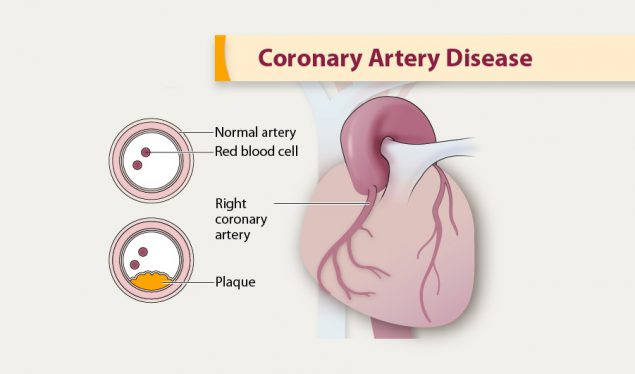

Image from [CDC](https://www.cdc.gov/heartdisease/coronary_ad.htm)

## Gathering data and overview

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns 
from sklearn import svm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Import libraries

In [2]:
heart = pd.read_csv('processed.cleveland.data',names=['age', 'sex', 'cp', 'trtbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca',
                       'thal','target'])
heart
# Import heart dataset. Since data do not have column names, we can add this to help with names function

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
print(heart.shape)
print(heart.dtypes)
print(heart.head(5))
# high-level overview of data shape and composition

(303, 14)
age        float64
sex        float64
cp         float64
trtbps     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
target       int64
dtype: object
    age  sex   cp  trtbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [4]:
heart_clean = heart.copy()
# Make copy of data set before making minor wrangling operations

In [5]:
heart_clean['target'] = heart_clean['target'].replace([2,3,4],1)
heart_clean
# Reclassifying 2, 3, 4 from target to 1 (refer to Esposito et al., 1997)

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
heart_clean['target'] = heart_clean['target'].replace([0],'HasCornary')
heart_clean['target'] = heart_clean['target'].replace([1],'NoCornary')

In [7]:
heart_clean['target'] = heart_clean['target'].replace(['HasCornary'],1)
heart_clean['target'] = heart_clean['target'].replace(['NoCornary'],0)

We are doing this operation as we need to convert the has the disease from 0 to 1 (for logistic regression). To do this we are changing from a number to a string and back to a number. If we changed all 0 to 1's and then all 1's to 0's we would only have 0's. Doing an intermediate step to strings avoids this.

In [8]:
heart_clean.isnull().sum()
# We have no null/NaN values in dataset, however it looks like we have question marks in columns, e.g. ca and thal

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [9]:
heart_clean[heart_clean.isin(['?']).any(axis=1)]
# Finding the row index for rows that have a question mark

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,1
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,1
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,1


In [10]:
pos = [87,166,192,266,287,302]
heart_clean.drop(heart_clean.index[pos], inplace=True)
# Dropping these six rows, since impution would be difficult given the small number of missing data

In [11]:
heart_clean[heart_clean.isin(['?']).any(axis=1)]
# confirming that our cleaning operation worked

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [12]:
heart_clean

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0


In [13]:
heart_clean['Gender'] = heart_clean['sex'].apply(lambda x : 'Male' if x == 1 else 'Female')
heart_clean
# Change sex to gender and giving Male/female for visuals later on

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,Male
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,Male
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,Male
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1,Male
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0,Female
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0,Male
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0,Male
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0,Male


In [14]:
heart_clean.to_csv('heart_clean.csv')
# Exporting cleaned data to csv file so that it can be used at a later stage

## EDA

In [15]:
heart_clean.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.538721
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


###  What is the proportion of patients who have coronary artery disease in this dataset?

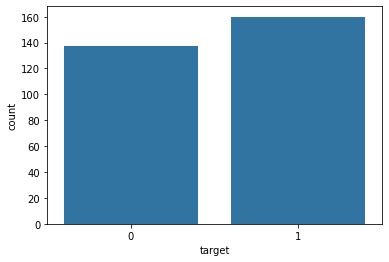

In [16]:
base_color = sns.color_palette()[0]
sns.countplot(data = heart_clean, x = 'target', color = base_color);
# Where 1 is where a patient has coronary artery disease

In [17]:
heart_clean['target'].value_counts()

1    160
0    137
Name: target, dtype: int64

In [18]:
Percent_coronary = (160/297)*100
Percent_coronary
# 53.9 % of patients have coronary artery disease

53.87205387205387

We can see that there is a good balance of patients with coronary artery disease (i.e., target is 1) in comparision to patients that do not have coronary artery disease (160 to 137) or 53.9%

###  What is the proportion of patients who are male?

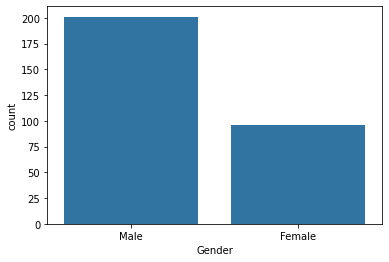

In [19]:
sns.countplot(data = heart_clean, x = 'Gender', color = base_color);

In [20]:
heart_clean['Gender'].value_counts()

Male      201
Female     96
Name: Gender, dtype: int64

In [21]:
Percent_male = (201/297)*100
Percent_male
# 67.7 % of patients are male (32.3% are female)

67.67676767676768

There is approximately double the amount of male patients in this study when compared to female patients

### Which gender has a higher incidence of coranary heart disease?

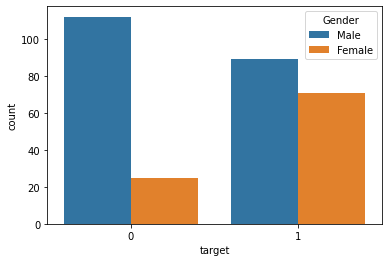

In [22]:
sns.countplot(data = heart_clean, x = 'target', hue = 'Gender');

We can see there is a similar portportion of males to females who have coronary artery disease (target = 1), however there is a disproportionately higher amount of males to females who do not have coronary artery disease (approx 5:1)

### Do mean cholesterol levels differ as a function of gender?

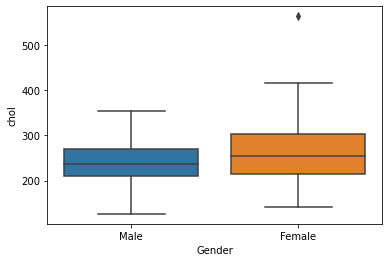

In [23]:
sns.boxplot(x = heart_clean['Gender'],y = heart_clean['chol']);

In [24]:
heart_clean.groupby('Gender').agg({'chol':[np.mean,np.median, np.std, np.size]})

chol                         
              mean median        std   size
Gender                                     
Female  262.229167  255.0  65.070727   96.0
Male    240.243781  236.0  42.816881  201.0

The median cholesterol concentration is higher in females compared to males, however there is an outlier for the female patients

### Does cholesterol concentrations differ as a function of coronary artery disease?

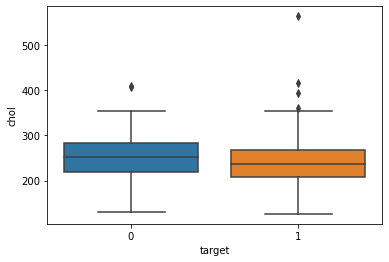

In [25]:
sns.boxplot(x = heart_clean['target'],y = heart_clean['chol']);

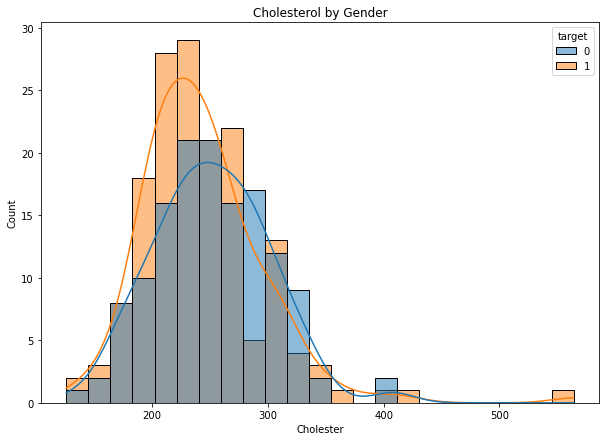

In [26]:
plt.figure(figsize=(10, 7))
sns.histplot(data=heart_clean, x='chol', hue='target', kde=True)
plt.title('Cholesterol by Gender')
plt.xlabel('Cholester')
plt.show();

In [27]:
heart_clean.groupby('target').agg({'chol':[np.mean,np.median, np.std, np.size]})

chol                         
              mean median        std   size
target                                     
0       251.854015  253.0  49.679937  137.0
1       243.493750  235.5  53.757550  160.0

While the median cholesterol levels are lower in patients who have coronary artery disease, there are more outliers in patients who have coronary artery disease

### Do patients with chest pain have higher levels of cholesterol?

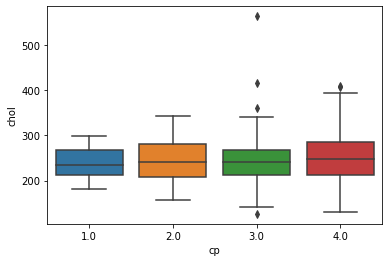

In [28]:
sns.boxplot(x = heart_clean['cp'],y = heart_clean['chol']);

The median values of cholesterol are quite similar between the different types of chest pain, however non-angina pain (3) has more outliers


Which gender had the higest max heart rate?

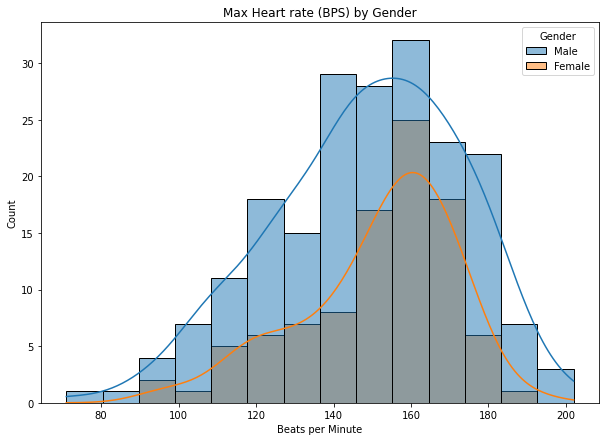

In [29]:
plt.figure(figsize=(10, 7))
sns.histplot(data=heart_clean, x='thalach', hue='Gender', kde=True)
plt.title('Max Heart rate (BPS) by Gender')
plt.xlabel('Beats per Minute')
plt.show();

In [30]:
heart_clean.groupby('Gender').agg({'thalach':[np.mean,np.median, np.std, np.size]})

thalach                         
              mean median        std   size
Gender                                     
Female  151.604167  157.0  19.722538   96.0
Male    148.641791  150.0  24.317299  201.0

While females had higher median max heart rate, a higher proportion of males had a greater frequency at max heart rate (more males in data set)

### Do younger or older patients have coronary artery disease?

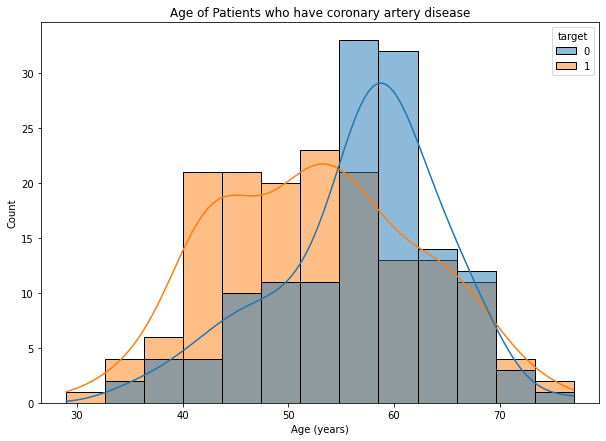

In [31]:
plt.figure(figsize=(10, 7))
sns.histplot(data=heart_clean, x='age', hue='target', kde=True)
plt.title('Age of Patients who have coronary artery disease')
plt.xlabel('Age (years)')
plt.show();

In [32]:
heart_clean.groupby('target').agg({'age':[np.mean,np.median, np.std, np.size]})

age                        
             mean median       std   size
target                                   
0       56.759124   58.0  7.899670  137.0
1       52.643750   52.0  9.551151  160.0

Younger patients have coronary artery disease. Patients who do not have coronary artery disease are older.

### Is there correlation between variables?

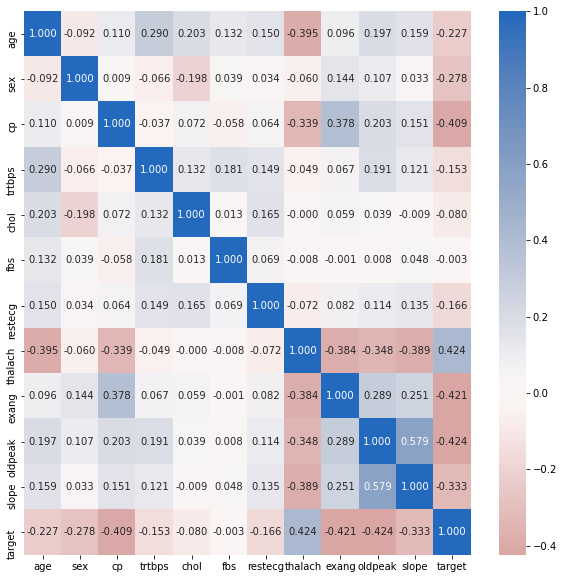

In [33]:
plt.figure(figsize = [10, 10])
sns.heatmap(heart_clean.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

There is no very strong positive or negative linear associations in this data that could potentially interfere with prediction.

## Prediction

### Initial processing

In [34]:
heart_prediction = heart_clean.copy()

In [35]:
heart_prediction.drop(['Gender'], axis = 1,inplace = True)
heart_prediction

# Deleting categorical variable as not needed for prediction

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0


In [36]:
heart_prediction

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0


In [37]:
heart_prediction.to_csv('heart_prediction.csv')
# Exporting data to be used for later on

In [38]:
## Logistic regression

In [39]:
heart_prediction['Intercept'] = 1
# Adding intercept

y = heart_prediction['target']
X = heart_prediction.drop('target', axis=1)
# define X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

0.8166666666666667


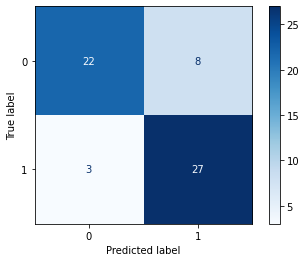

In [40]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);
# Confusion matrix

In [41]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

Accuracy: 0.817
Precision: 0.771
Recall: 0.900
F1 Score: 0.831


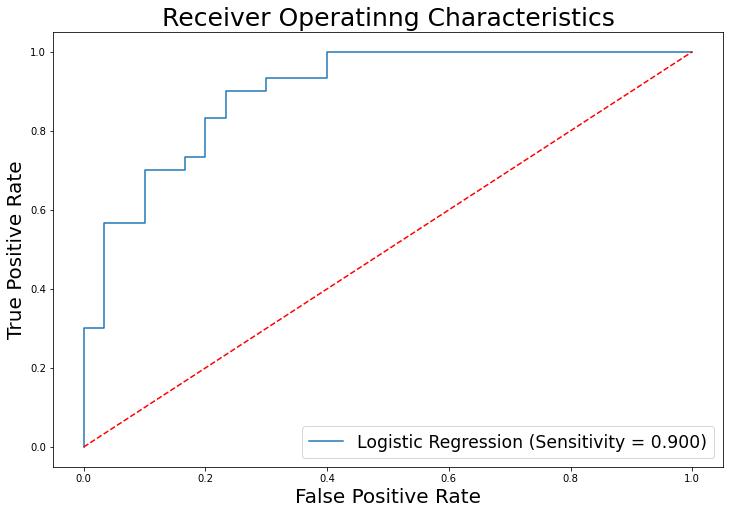

In [42]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.900

We have a good starting point with this logistic regression in that we have a good balance of true postitives and true negatives predicted from the confusion matrix. The false positives is higher than false negatives.

## Support Vector Machine

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Splitting the data so 20% is for testing

In [44]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")

Accuracy of Test Dataset: 0.833


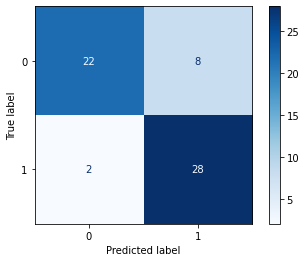

In [45]:
plot_confusion_matrix(svm_linear, X_test, y_test, cmap=plt.cm.Blues);
# Confusion matrix

SVM is better at predicted true negatives, however it has an increase of false negatives when compared to logistic regression. However the accuracy has improved using SVM.